In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [56]:
df = pd.read_csv("./datasets/fixed_battery_log.csv")
df = df.drop(df.columns[0],axis=1)
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

In [57]:
for i in users:
    print(i,"\n",df.loc[(df["User"] == i) & (df["state"] == "ON") & (df["date"] > dt.datetime(2021,12,1)) & (df["date"] < dt.datetime(2022,1,31))]["battery"].describe())

Narita 
 count    144.000000
mean      46.173611
std       21.862357
min        3.000000
25%       29.750000
50%       47.000000
75%       60.250000
max      100.000000
Name: battery, dtype: float64
Yusuke 
 count    134.000000
mean      49.037313
std       12.271617
min       14.000000
25%       42.000000
50%       49.000000
75%       56.750000
max       91.000000
Name: battery, dtype: float64
Ayumi 
 count    160.000000
mean      78.231250
std       22.705171
min       21.000000
25%       68.750000
50%       87.500000
75%       95.000000
max      100.000000
Name: battery, dtype: float64
Daiki 
 count    201.000000
mean      63.542289
std       28.565179
min        9.000000
25%       37.000000
50%       66.000000
75%       91.000000
max      100.000000
Name: battery, dtype: float64
Shunya 
 count    128.000000
mean      33.195312
std       21.086271
min        1.000000
25%       18.000000
50%       28.000000
75%       42.000000
max       97.000000
Name: battery, dtype: float64
Hayate 

In [58]:
def Frequency_Distribution(data, class_width=None):
    data = np.asarray(data)
    if class_width is None:
        class_size = int(np.log2(data.size).round()) + 1
        class_width = round((data.max() - data.min()) / class_size)

    bins = np.arange(0, data.max()+class_width+1, class_width)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))

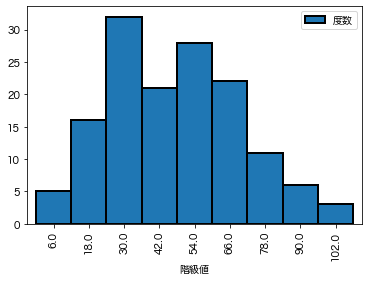

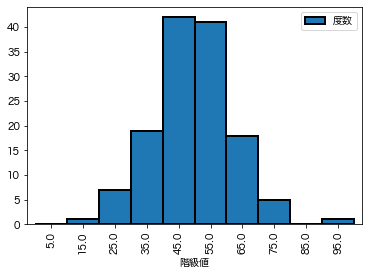

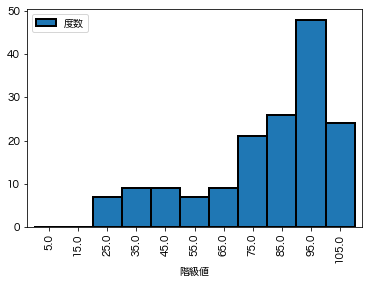

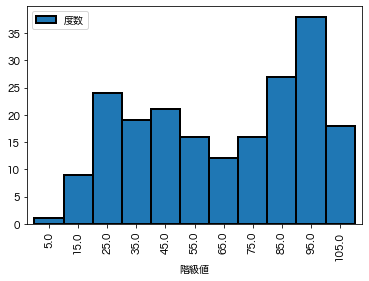

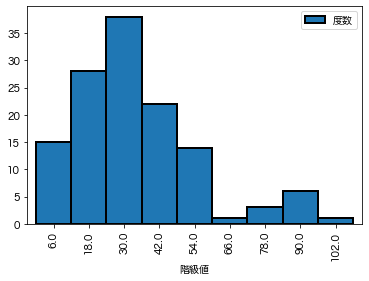

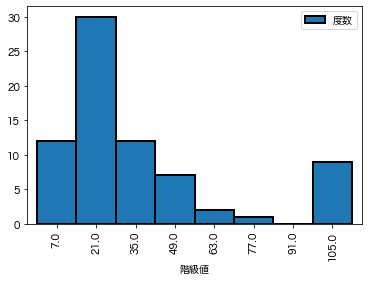

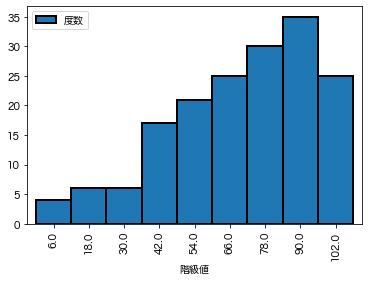

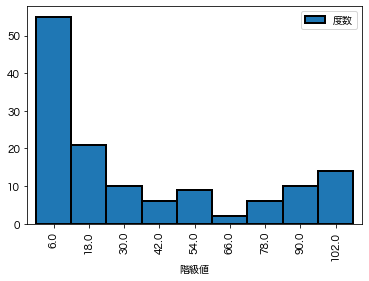

In [60]:
for i in range(len(users)):
    User_F_data = Frequency_Distribution(df.loc[(df["User"] == users[i]) & 
                                                (df["state"] == "ON") & 
                                                (df["date"] > dt.datetime(2021,12,1)) & 
                                                (df["date"] < dt.datetime(2022,1,31))]["battery"])
    User_F_data.plot.bar(x="階級値",y="度数",width=1,ec="k",lw=2)
    plt.savefig("bs_2_results/%s_%d.jpg" % (users[i],i)) 